# MAPMF Alerts Dataset - Interactive Analysis
## Exploratory Data Analysis Notebook

This notebook provides interactive examples for analyzing the MAPMF alerts dataset.

## Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Data

In [2]:
# Load the dataset
df = pd.read_csv('/Users/quynhmai/Downloads/violence_against_journalists/mapmf_alerts_cleaned.csv')

# Convert date columns
df['date'] = pd.to_datetime(df['date'])
df['published_at_date'] = pd.to_datetime(df['published_at_date'])

print(f"Dataset loaded: {len(df):,} rows, {len(df.columns)} columns")
df.head()

Dataset loaded: 11,305 rows, 21 columns


,id,title,date,year,month,day_of_week,country,region_level_1,region_level_2,primary_incident_type,incident_type_count,type_of_incident,primary_source,source_of_incident,context_of_incident,region_names,content,content_length,published_at_date,_geo_lat,_geo_lng
0,34388,Journalist Emilia Șercan targeted with smear c...,2026-01-12,2026,1,Monday,Romania,Romania,Bucharest,Intimidation/threatening,4,Intimidation/threatening | Verbal attack | Dis...,Media outlet,Media outlet | Legislation: government/public ...,Online/digital,EU Member States | Romania | Bucharest,"On 12 January 2026, investigative journalist E...",1740,2026-01-15,44.436141,26.102684
1,34382,OCCRP website targeted with DDoS attack,2026-01-12,2026,1,Monday,Netherlands,Netherlands,North Holland,Hacking/DDoS,5,Hacking/DDoS | Attack to property | Blocked di...,Unknown source of incident,Unknown source of incident,Online/digital,EU Member States | Netherlands | North Holland,"On 13 January 2026, the Organised Crime and Co...",1019,2026-01-14,52.373080,4.892453
2,34358,Slovak political commentator Peter Schutz viol...,2026-01-10,2026,1,Saturday,Slovakia,Slovakia,Eastern Slovakia,Injury (physical assault resulting in injury),2,Injury (physical assault resulting in injury) ...,Unknown source of incident,Unknown source of incident,Public place/street,EU Member States | Slovakia | Eastern Slovakia...,"On 10 January 2025, Slovak political commentat...",2401,2026-01-12,48.717227,21.249677
3,34392,Ici Nord Sylvain Charley cyber harassed,2026-01-08,2026,1,Thursday,France,France,Hauts-de-France,"Harassment, insult, bullying",2,"Harassment, insult, bullying | Verbal attack",Private individual(s),Private individual(s),Online/digital,EU Member States | France | Hauts-de-France | ...,"On 8 January 2026, Sylvain Charley, a journali...",1045,2026-01-16,50.636565,3.063528
4,34356,Police opens investigation into alleged survei...,2026-01-08,2026,1,Thursday,Ukraine,Ukraine,Київська міська громада,Surveillance and interception of journalistic ...,2,Surveillance and interception of journalistic ...,Private individual(s),Private individual(s),Online/digital,EU candidate countries | Ukraine | Київська мі...,"On 8 January 2026, Ukrainian authorities repor...",1865,2026-01-12,50.450034,30.524136


## Quick Dataset Overview

In [3]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11305 entries, 0 to 11304
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     11305 non-null  int64         
 1   title                  11305 non-null  object        
 2   date                   11305 non-null  datetime64[ns]
 3   year                   11305 non-null  int64         
 4   month                  11305 non-null  int64         
 5   day_of_week            11305 non-null  object        
 6   country                11305 non-null  object        
 7   region_level_1         11305 non-null  object        
 8   region_level_2         11174 non-null  object        
 9   primary_incident_type  11305 non-null  object        
 10  incident_type_count    11305 non-null  int64         
 11  type_of_incident       11305 non-null  object        
 12  primary_source         11305 non-null  object        
 13  s

In [4]:
# Summary statistics for numerical columns
df.describe()

,id,date,year,month,incident_type_count,content_length,published_at_date,_geo_lat,_geo_lng
count,11305.000000,11305,11305.000000,11305.000000,11305.000000,11305.000000,11305,11305.000000,11305.000000
mean,25517.778947,2020-08-14 11:54:58.115877632,2020.115789,6.574967,3.061920,1359.418399,2021-04-20 11:21:12.817337344,46.136787,21.090859
min,17952.000000,2014-01-14 00:00:00,2014.000000,1.000000,1.000000,63.000000,2018-02-16 00:00:00,-21.130738,-149.392631
25%,20795.000000,2017-01-27 00:00:00,2017.000000,4.000000,2.000000,761.000000,2018-02-16 00:00:00,41.330514,12.674297
50%,23967.000000,2021-03-23 00:00:00,2021.000000,7.000000,2.000000,1147.000000,2021-04-27 00:00:00,45.547955,20.448922
75%,31389.000000,2024-02-23 00:00:00,2024.000000,10.000000,4.000000,1699.000000,2024-04-09 00:00:00,50.585647,29.052495
max,34392.000000,2026-01-12 00:00:00,2026.000000,12.000000,13.000000,23545.000000,2026-01-16 00:00:00,69.649205,158.647219
std,5416.333868,NaN,3.680314,3.404946,1.480131,966.163727,NaN,5.780747,14.490676


In [5]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print("Missing Values:")
missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

Missing Values:


,Missing Count,Percentage
region_level_2,131,1.158779


## 1. Temporal Analysis

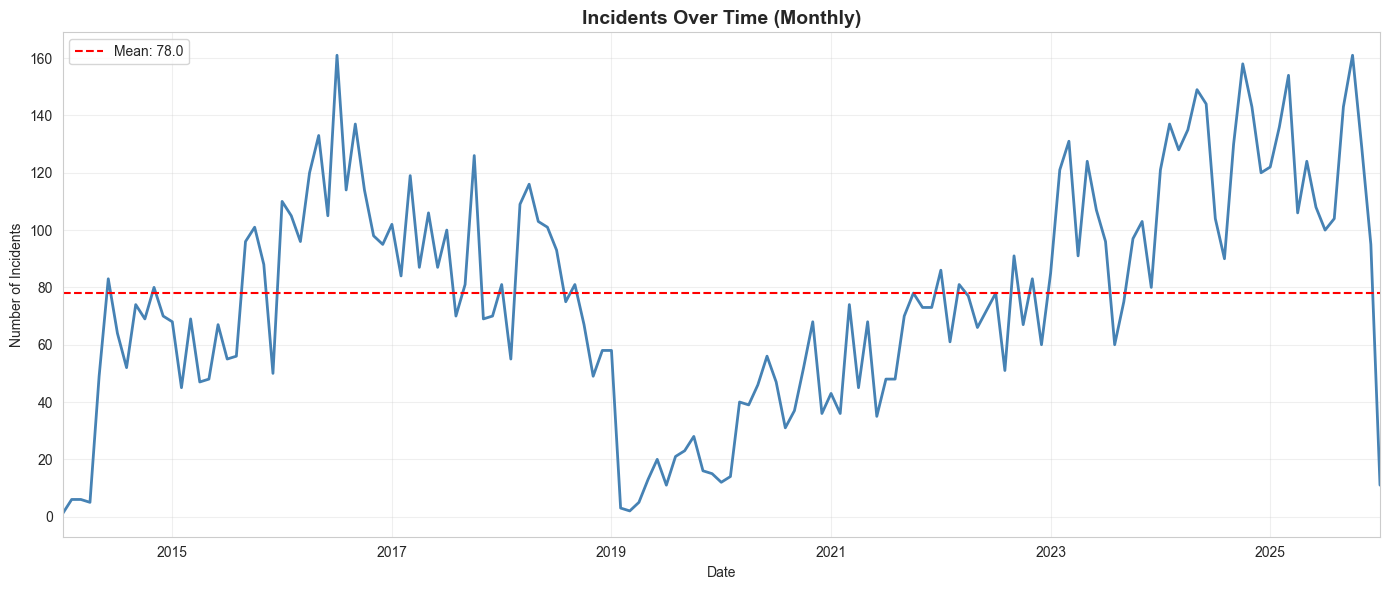

Average incidents per month: 77.97
Peak month: 2016-07 with 161 incidents


In [6]:
# Incidents over time (monthly)
monthly_counts = df.groupby(df['date'].dt.to_period('M')).size()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='line', linewidth=2, color='steelblue')
plt.axhline(y=monthly_counts.mean(), color='red', linestyle='--', label=f'Mean: {monthly_counts.mean():.1f}')
plt.title('Incidents Over Time (Monthly)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average incidents per month: {monthly_counts.mean():.2f}")
print(f"Peak month: {monthly_counts.idxmax()} with {monthly_counts.max()} incidents")

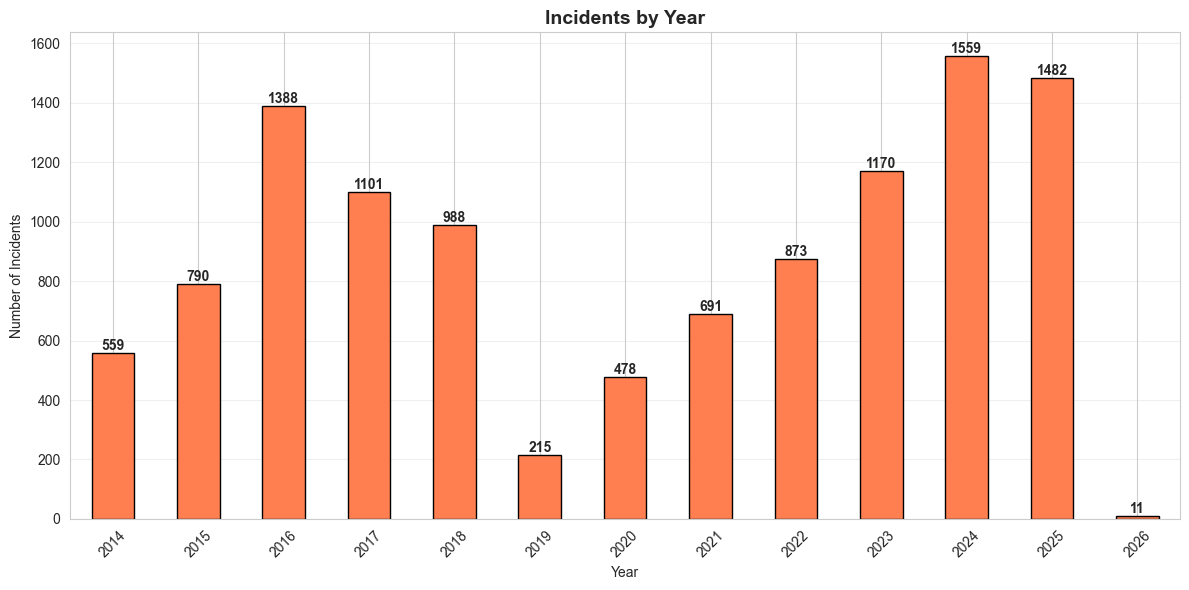

In [7]:
# Yearly trends
yearly_counts = df.groupby('year').size()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Incidents by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(yearly_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

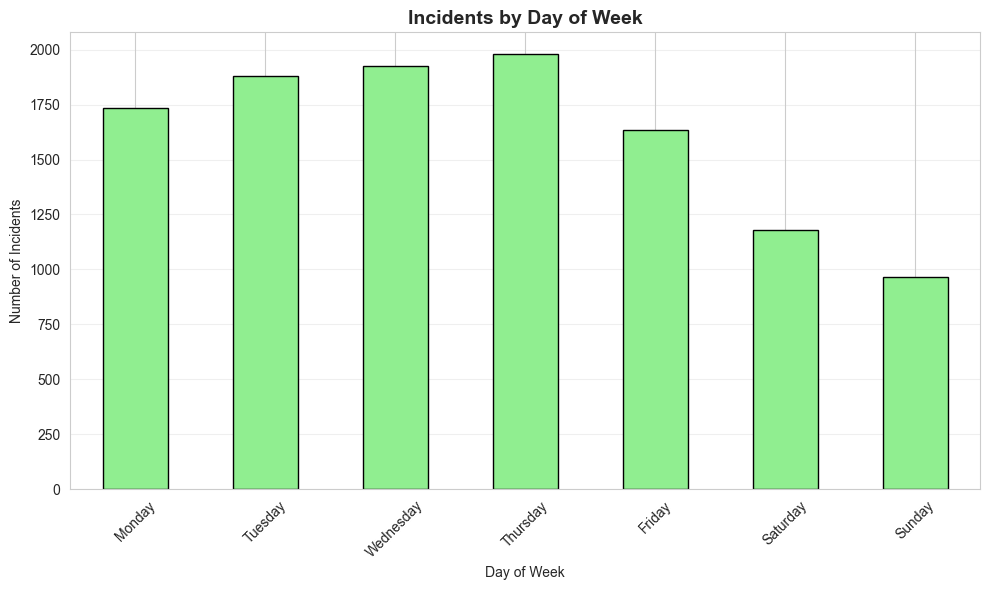

In [8]:
# Day of week pattern
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Incidents by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 2. Geographic Analysis

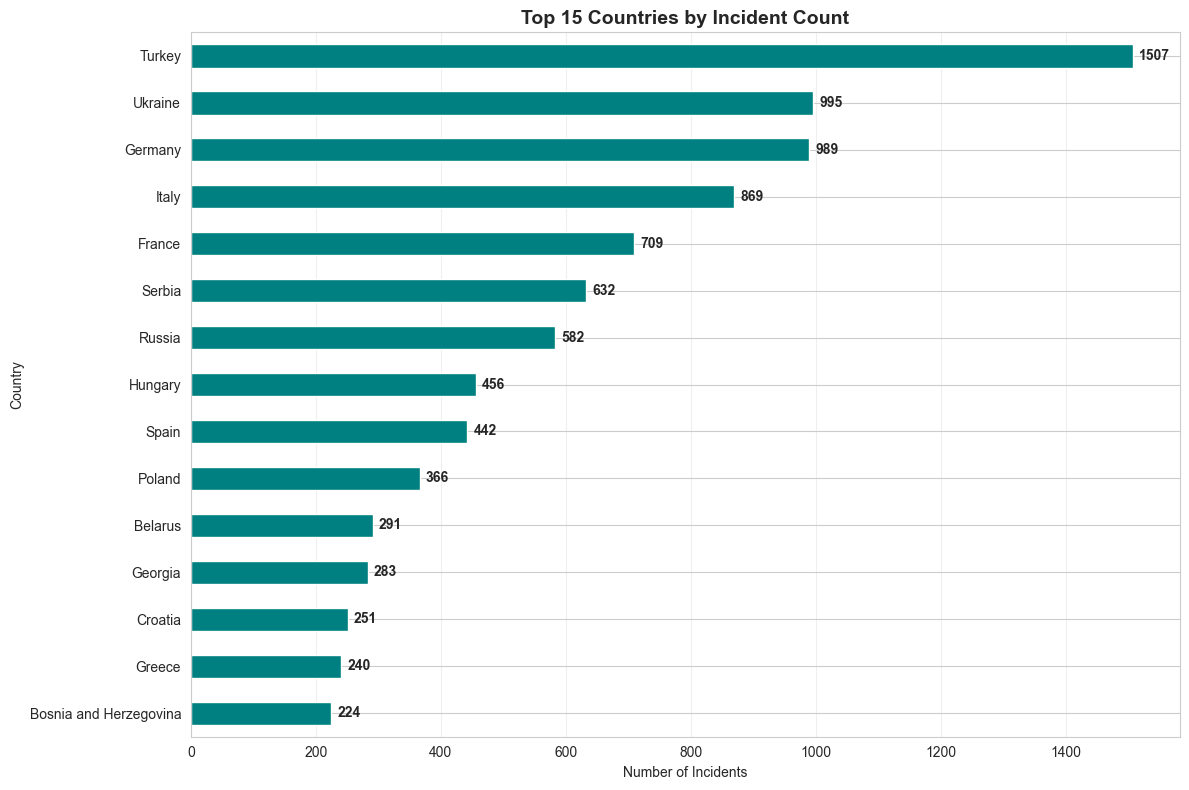


Top 10 Countries:
Turkey              :  1507 (13.33%)
Ukraine             :   995 ( 8.80%)
Germany             :   989 ( 8.75%)
Italy               :   869 ( 7.69%)
France              :   709 ( 6.27%)
Serbia              :   632 ( 5.59%)
Russia              :   582 ( 5.15%)
Hungary             :   456 ( 4.03%)
Spain               :   442 ( 3.91%)
Poland              :   366 ( 3.24%)


In [9]:
# Top 15 countries
top_countries = df['country'].value_counts().head(15)

plt.figure(figsize=(12, 8))
top_countries.plot(kind='barh', color='teal')
plt.title('Top 15 Countries by Incident Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(top_countries.values):
    plt.text(v + 10, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 10 Countries:")
for country, count in top_countries.head(10).items():
    pct = (count / len(df)) * 100
    print(f"{country:20s}: {count:5d} ({pct:5.2f}%)")

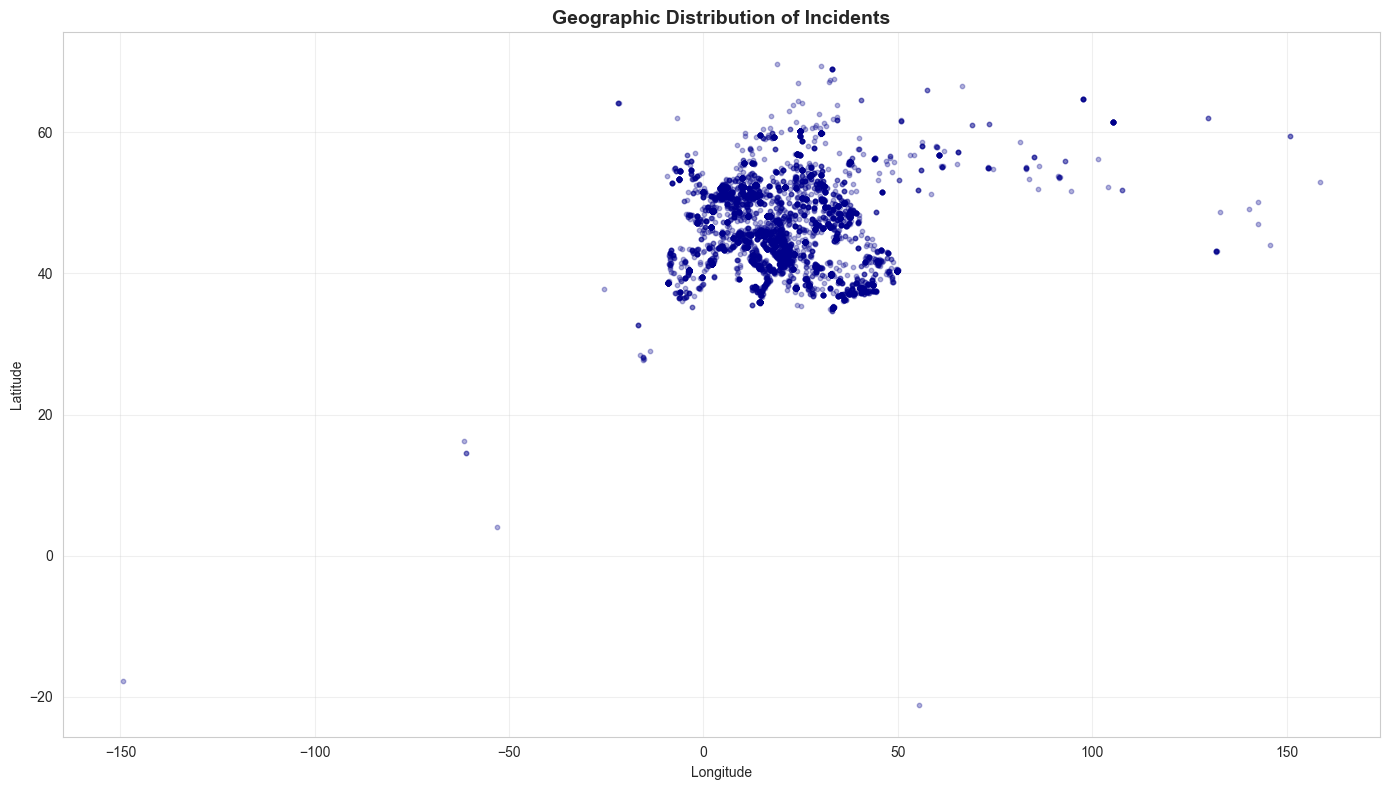

In [10]:
# Geographic scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(df['_geo_lng'], df['_geo_lat'], alpha=0.3, s=10, c='darkblue')
plt.title('Geographic Distribution of Incidents', fontsize=14, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# Top regions (sub-national)
top_regions = df.groupby(['country', 'region_level_2']).size().sort_values(ascending=False).head(15)

print("Top 15 Regions:")
print("=" * 80)
for (country, region), count in top_regions.items():
    print(f"{country:15s} | {region:40s}: {count:4d}")

Top 15 Regions:
Turkey          | Marmara Region                          :  716
Serbia          | Central Serbia                          :  506
Hungary         | Central Hungary                         :  387
France          | Ile-de-France                           :  348
Turkey          | Central Anatolia Region                 :  339
Germany         | Berlin                                  :  329
Ukraine         | Київська міська громада                 :  299
Russia          | Central Federal District                :  284
Poland          | Masovian Voivodeship                    :  265
Italy           | Lazio                                   :  255
Georgia         | Tbilisi                                 :  230
Turkey          | Southeastern Anatolia Region            :  202
Greece          | Attica                                  :  170
Spain           | Community of Madrid                     :  166
Albania         | Central Albania                         :  161


## 3. Incident Type Analysis

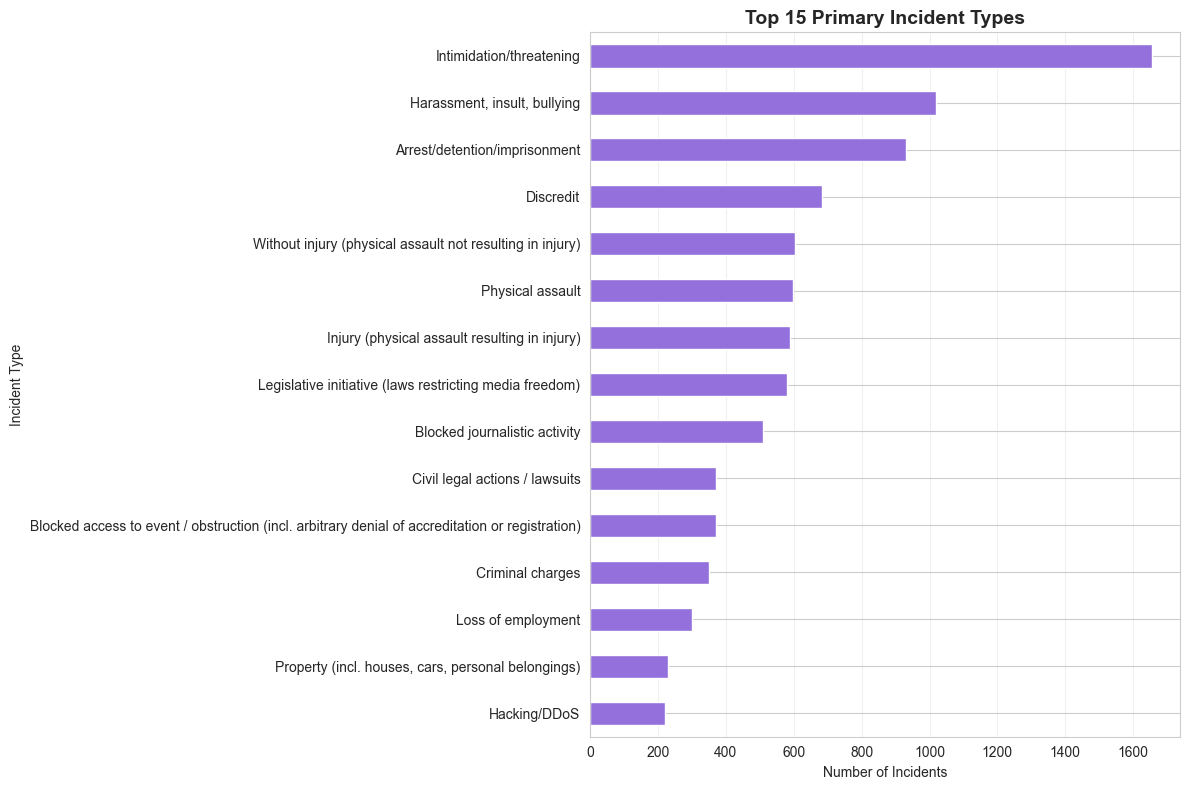


Top 10 Incident Types:
Intimidation/threatening                                    :  1655 (14.64%)
Harassment, insult, bullying                                :  1019 ( 9.01%)
Arrest/detention/imprisonment                               :   930 ( 8.23%)
Discredit                                                   :   683 ( 6.04%)
Without injury (physical assault not resulting in injury)   :   605 ( 5.35%)
Physical assault                                            :   598 ( 5.29%)
Injury (physical assault resulting in injury)               :   589 ( 5.21%)
Legislative initiative (laws restricting media freedom)     :   579 ( 5.12%)
Blocked journalistic activity                               :   509 ( 4.50%)
Civil legal actions / lawsuits                              :   372 ( 3.29%)


In [12]:
# Top incident types
top_incidents = df['primary_incident_type'].value_counts().head(15)

plt.figure(figsize=(12, 8))
top_incidents.plot(kind='barh', color='mediumpurple')
plt.title('Top 15 Primary Incident Types', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Type')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 10 Incident Types:")
for incident_type, count in top_incidents.head(10).items():
    pct = (count / len(df)) * 100
    print(f"{incident_type:60s}: {count:5d} ({pct:5.2f}%)")

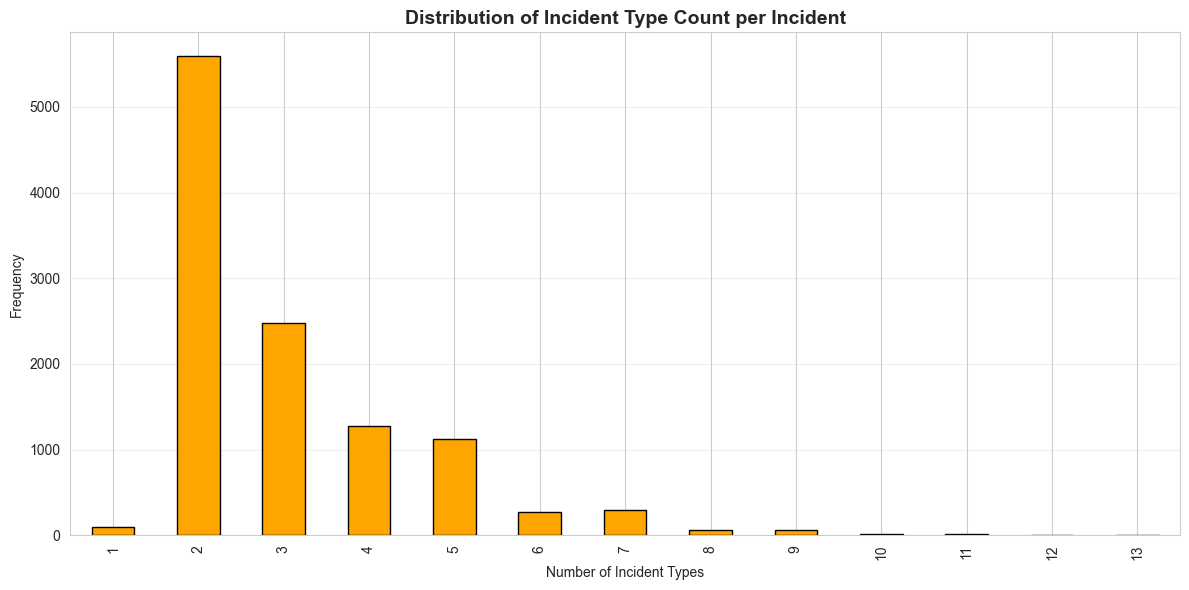

Average incident types per incident: 3.06
Median: 2


In [13]:
# Incident type count distribution
incident_count_dist = df['incident_type_count'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
incident_count_dist.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Incident Type Count per Incident', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incident Types')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Average incident types per incident: {df['incident_type_count'].mean():.2f}")
print(f"Median: {df['incident_type_count'].median():.0f}")

## 4. Source Analysis

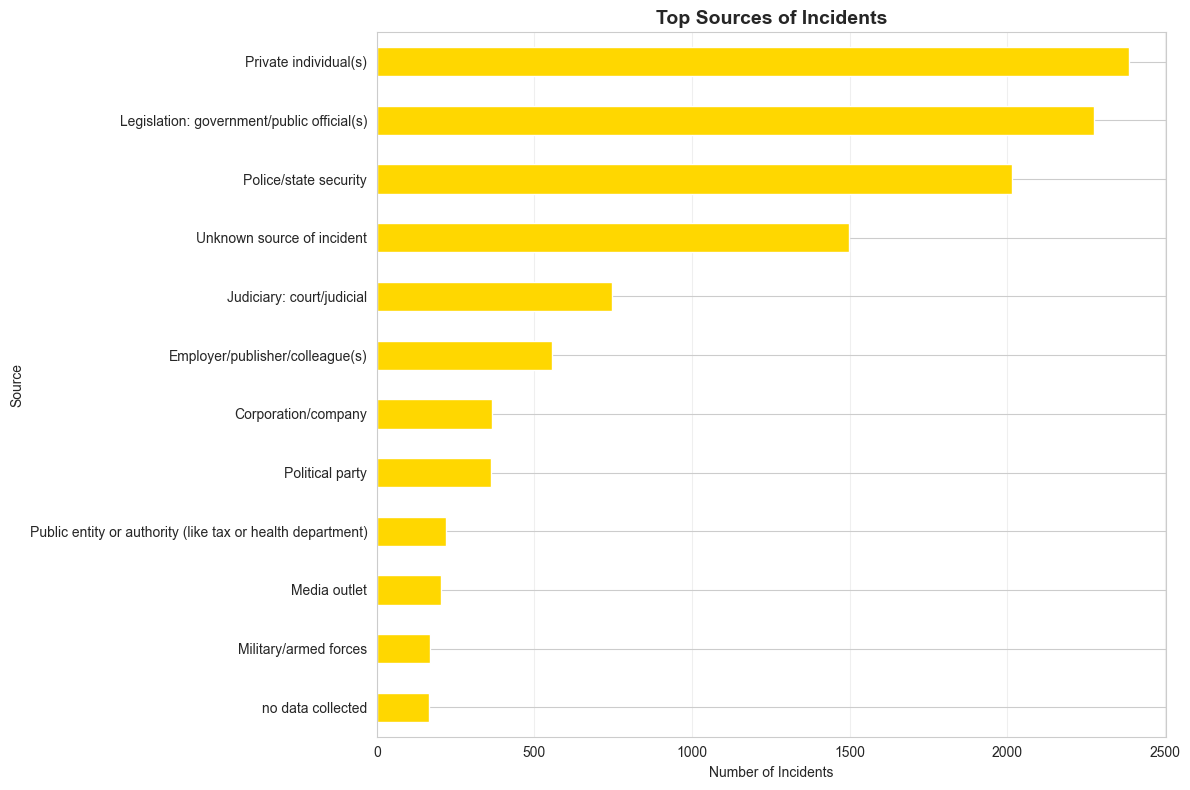


Source Distribution:
Private individual(s)                                       :  2385 (21.10%)
Legislation: government/public official(s)                  :  2275 (20.12%)
Police/state security                                       :  2015 (17.82%)
Unknown source of incident                                  :  1498 (13.25%)
Judiciary: court/judicial                                   :   746 ( 6.60%)
Employer/publisher/colleague(s)                             :   556 ( 4.92%)
Corporation/company                                         :   366 ( 3.24%)
Political party                                             :   363 ( 3.21%)
Public entity or authority (like tax or health department)  :   219 ( 1.94%)
Media outlet                                                :   202 ( 1.79%)
Military/armed forces                                       :   167 ( 1.48%)
no data collected                                           :   165 ( 1.46%)


In [14]:
# Top sources
top_sources = df['primary_source'].value_counts().head(12)

plt.figure(figsize=(12, 8))
top_sources.plot(kind='barh', color='gold')
plt.title('Top Sources of Incidents', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Source')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nSource Distribution:")
for source, count in top_sources.items():
    pct = (count / len(df)) * 100
    print(f"{source:60s}: {count:5d} ({pct:5.2f}%)")

In [15]:
# Source-Incident Type combinations
source_incident = df.groupby(['primary_source', 'primary_incident_type']).size().reset_index(name='count')
top_combos = source_incident.nlargest(15, 'count')

print("Top 15 Source-Incident Type Combinations:")
print("=" * 100)
for idx, row in top_combos.iterrows():
    print(f"{row['primary_source']:45s} + {row['primary_incident_type']:45s}: {row['count']:4d}")

Top 15 Source-Incident Type Combinations:
Police/state security                         + Arrest/detention/imprisonment                :  666
Private individual(s)                         + Intimidation/threatening                     :  581
Private individual(s)                         + Harassment, insult, bullying                 :  430
Unknown source of incident                    + Intimidation/threatening                     :  402
Legislation: government/public official(s)    + Legislative initiative (laws restricting media freedom):  401
Private individual(s)                         + Without injury (physical assault not resulting in injury):  393
Legislation: government/public official(s)    + Discredit                                    :  335
Legislation: government/public official(s)    + Intimidation/threatening                     :  289
Employer/publisher/colleague(s)               + Loss of employment                           :  245
Legislation: government/public offic

## 5. Context Analysis

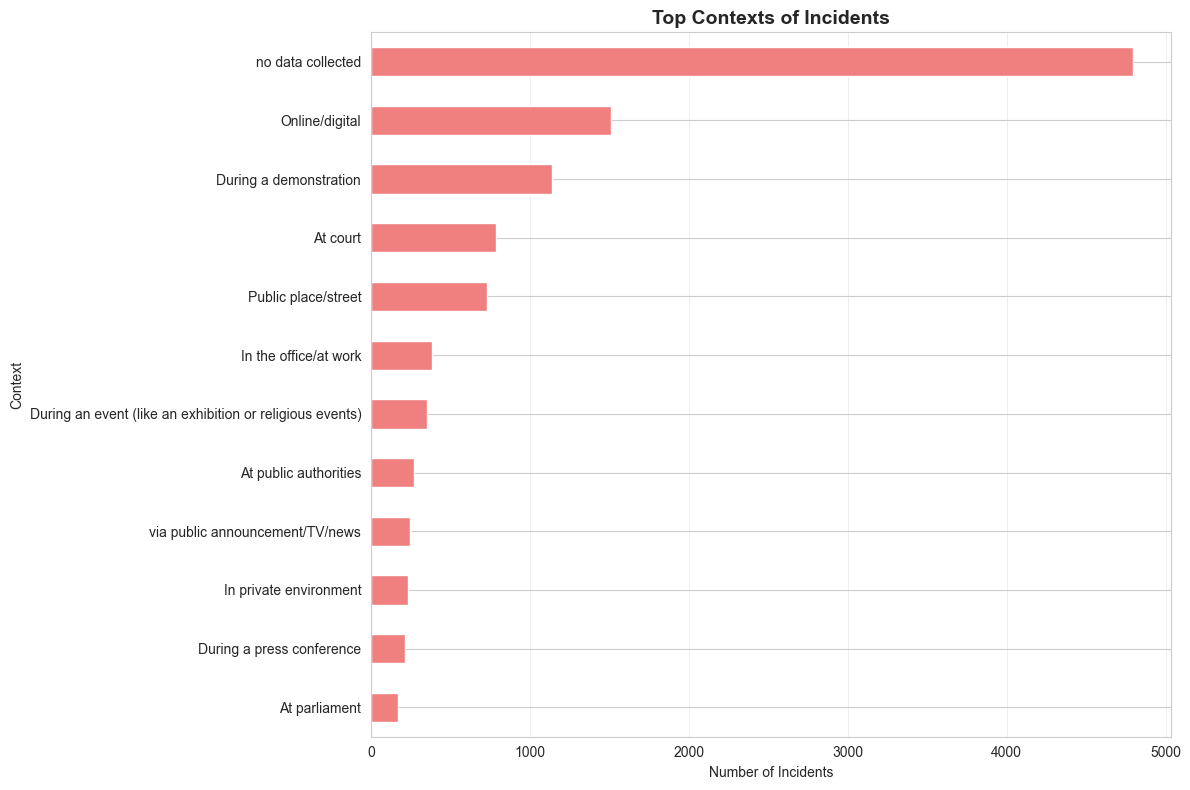


Context Distribution:
no data collected                                 :  4797 (42.43%)
Online/digital                                    :  1510 (13.36%)
During a demonstration                            :  1138 (10.07%)
At court                                          :   789 ( 6.98%)
Public place/street                               :   730 ( 6.46%)
In the office/at work                             :   383 ( 3.39%)
During an event (like an exhibition or religious events):   353 ( 3.12%)
At public authorities                             :   271 ( 2.40%)
via public announcement/TV/news                   :   248 ( 2.19%)
In private environment                            :   231 ( 2.04%)
During a press conference                         :   213 ( 1.88%)
At parliament                                     :   173 ( 1.53%)


In [16]:
# Context distribution
context_dist = df['context_of_incident'].value_counts().head(12)

plt.figure(figsize=(12, 8))
context_dist.plot(kind='barh', color='lightcoral')
plt.title('Top Contexts of Incidents', fontsize=14, fontweight='bold')
plt.xlabel('Number of Incidents')
plt.ylabel('Context')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nContext Distribution:")
for context, count in context_dist.items():
    pct = (count / len(df)) * 100
    print(f"{context:50s}: {count:5d} ({pct:5.2f}%)")

## 6. Country-Incident Type Heatmap

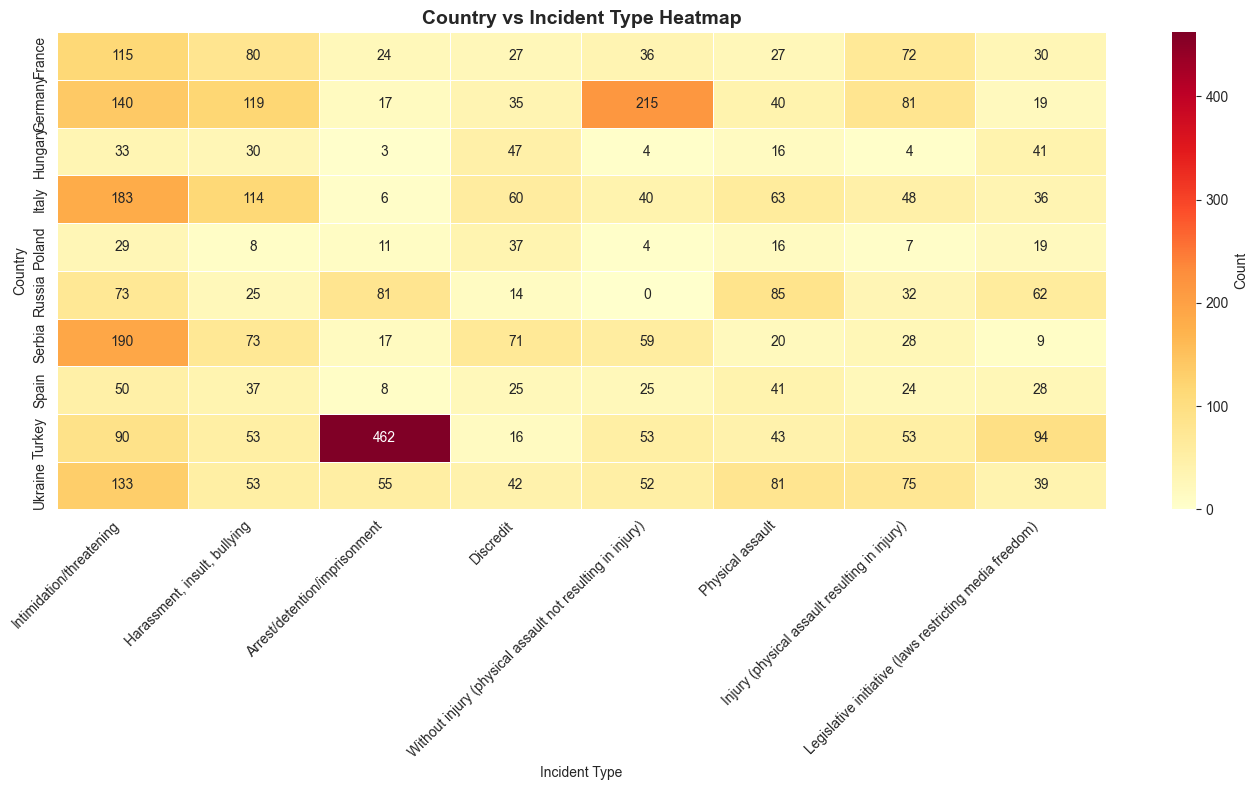

In [17]:
# Create country-incident type matrix
top_countries_list = df['country'].value_counts().head(10).index
top_incidents_list = df['primary_incident_type'].value_counts().head(8).index

filtered_df = df[df['country'].isin(top_countries_list)]
matrix = filtered_df.groupby(['country', 'primary_incident_type']).size().unstack(fill_value=0)
matrix = matrix[top_incidents_list]

plt.figure(figsize=(14, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Count'})
plt.title('Country vs Incident Type Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Incident Type')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
"""
MAPMF Alerts - EU Region Analysis
==================================
Analyze incidents based on EU membership status:
- EU Member States
- EU Candidate Countries
- Non-EU Countries
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract EU status from region_names column
# The region_names format is: "Status | Country | Region | ..."
def extract_eu_status(region_name):
    """Extract EU membership status from region_names field"""
    if pd.isna(region_name):
        return 'Unknown'
    
    parts = region_name.split(' | ')
    if len(parts) > 0:
        status = parts[0].strip()
        if 'EU Member States' in status:
            return 'EU Member States'
        elif 'EU candidate countries' in status:
            return 'EU Candidate Countries'
        elif 'Non-EU countries' in status:
            return 'Non-EU Countries'
    
    return 'Unknown'

# Apply the function
df['eu_status'] = df['region_names'].apply(extract_eu_status)


In [19]:

print("=" * 80)
print("INCIDENTS BY EU MEMBERSHIP STATUS")
print("=" * 80)

eu_status_counts = df['eu_status'].value_counts()
total = len(df)

print(f"\nTotal Incidents: {total:,}\n")

for status, count in eu_status_counts.items():
    percentage = (count / total) * 100
    print(f"{status:25s}: {count:6,} ({percentage:5.2f}%)")



INCIDENTS BY EU MEMBERSHIP STATUS

Total Incidents: 11,305

EU Member States         :  5,835 (51.61%)
EU Candidate Countries   :  4,216 (37.29%)
Non-EU Countries         :  1,172 (10.37%)
Unknown                  :     82 ( 0.73%)


In [20]:
# ============================================================================
# ANALYSIS 2: Top Countries by EU Status
# ============================================================================
print("\n" + "=" * 80)
print("TOP 10 COUNTRIES BY EU STATUS")
print("=" * 80)

for status in ['EU Member States', 'EU Candidate Countries', 'Non-EU Countries']:
    status_df = df[df['eu_status'] == status]
    print(f"\n{status}:")
    print("-" * 80)
    top_countries = status_df['country'].value_counts().head(10)
    for country, count in top_countries.items():
        percentage = (count / len(status_df)) * 100
        print(f"  {country:20s}: {count:5,} ({percentage:5.2f}%)")
        



TOP 10 COUNTRIES BY EU STATUS

EU Member States:
--------------------------------------------------------------------------------
  Germany             :   989 (16.95%)
  Italy               :   869 (14.89%)
  France              :   709 (12.15%)
  Hungary             :   456 ( 7.81%)
  Spain               :   442 ( 7.57%)
  Poland              :   366 ( 6.27%)
  Croatia             :   251 ( 4.30%)
  Greece              :   240 ( 4.11%)
  Romania             :   208 ( 3.56%)
  Netherlands         :   168 ( 2.88%)

EU Candidate Countries:
--------------------------------------------------------------------------------
  Turkey              : 1,507 (35.74%)
  Ukraine             :   995 (23.60%)
  Serbia              :   632 (14.99%)
  Georgia             :   283 ( 6.71%)
  Bosnia and Herzegovina:   224 ( 5.31%)
  Albania             :   197 ( 4.67%)
  North Macedonia     :   182 ( 4.32%)
  Montenegro          :   107 ( 2.54%)
  Moldova             :    89 ( 2.11%)

Non-EU Countries:
-

In [21]:

# ============================================================================
# ANALYSIS 3: Incident Types by EU Status
# ============================================================================
print("\n" + "=" * 80)
print("TOP 5 INCIDENT TYPES BY EU STATUS")
print("=" * 80)

for status in ['EU Member States', 'EU Candidate Countries', 'Non-EU Countries']:
    status_df = df[df['eu_status'] == status]
    print(f"\n{status}:")
    print("-" * 80)
    top_incidents = status_df['primary_incident_type'].value_counts().head(5)
    for incident, count in top_incidents.items():
        percentage = (count / len(status_df)) * 100
        print(f"  {incident[:60]:60s}: {count:5,} ({percentage:5.2f}%)")



TOP 5 INCIDENT TYPES BY EU STATUS

EU Member States:
--------------------------------------------------------------------------------
  Intimidation/threatening                                    :   914 (15.66%)
  Harassment, insult, bullying                                :   616 (10.56%)
  Discredit                                                   :   414 ( 7.10%)
  Without injury (physical assault not resulting in injury)   :   370 ( 6.34%)
  Injury (physical assault resulting in injury)               :   311 ( 5.33%)

EU Candidate Countries:
--------------------------------------------------------------------------------
  Arrest/detention/imprisonment                               :   595 (14.11%)
  Intimidation/threatening                                    :   588 (13.95%)
  Harassment, insult, bullying                                :   329 ( 7.80%)
  Discredit                                                   :   249 ( 5.91%)
  Injury (physical assault resulting in injury) 

In [22]:

# ============================================================================
# ANALYSIS 4: Sources by EU Status
# ============================================================================
print("\n" + "=" * 80)
print("TOP 5 SOURCES BY EU STATUS")
print("=" * 80)

for status in ['EU Member States', 'EU Candidate Countries', 'Non-EU Countries']:
    status_df = df[df['eu_status'] == status]
    print(f"\n{status}:")
    print("-" * 80)
    top_sources = status_df['primary_source'].value_counts().head(5)
    for source, count in top_sources.items():
        percentage = (count / len(status_df)) * 100
        print(f"  {source:60s}: {count:5,} ({percentage:5.2f}%)")



TOP 5 SOURCES BY EU STATUS

EU Member States:
--------------------------------------------------------------------------------
  Private individual(s)                                       : 1,621 (27.78%)
  Legislation: government/public official(s)                  : 1,222 (20.94%)
  Unknown source of incident                                  :   728 (12.48%)
  Police/state security                                       :   691 (11.84%)
  Employer/publisher/colleague(s)                             :   383 ( 6.56%)

EU Candidate Countries:
--------------------------------------------------------------------------------
  Police/state security                                       :   895 (21.23%)
  Legislation: government/public official(s)                  :   765 (18.15%)
  Private individual(s)                                       :   653 (15.49%)
  Unknown source of incident                                  :   592 (14.04%)
  Judiciary: court/judicial                            

In [23]:

# ============================================================================
# ANALYSIS 5: Temporal Trends by EU Status
# ============================================================================
print("\n" + "=" * 80)
print("YEARLY TRENDS BY EU STATUS")
print("=" * 80)

df['date'] = pd.to_datetime(df['date'])
yearly_by_status = df.groupby(['year', 'eu_status']).size().unstack(fill_value=0)
print("\n")
print(yearly_by_status)



YEARLY TRENDS BY EU STATUS


eu_status  EU Candidate Countries  EU Member States  Non-EU Countries  Unknown
year                                                                          
2014                          197               326                27        9
2015                          292               407                85        6
2016                          536               530               313        9
2017                          293               423               377        8
2018                          274               442               262       10
2019                           57               129                28        1
2020                          133               289                46       10
2021                          159               499                31        2
2022                          409               451                 3       10
2023                          519               636                 0       15
2024                  


VISUALIZATION SAVED: eu_status_analysis.png

SUMMARY STATISTICS BY EU STATUS


                        Total Incidents  Countries  Avg Incident Types  Avg Content Length First Incident Last Incident
eu_status                                                                                                              
EU Candidate Countries             4216          9                2.99             1311.14     2014-02-13    2026-01-08
EU Member States                   5835         27                3.09             1320.25     2014-01-14    2026-01-12
Non-EU Countries                   1172          9                3.20             1746.00     2014-03-13    2022-02-25
Unknown                              82          1                3.16             1103.32     2014-04-23    2025-03-12

DETAILED BREAKDOWN SAVED: eu_status_by_country.csv
SUMMARY TABLE SAVED: eu_status_summary.csv

✓ Analysis complete!

Files created:
  1. eu_status_analysis.png - Comprehensive visualizations
  2. eu_

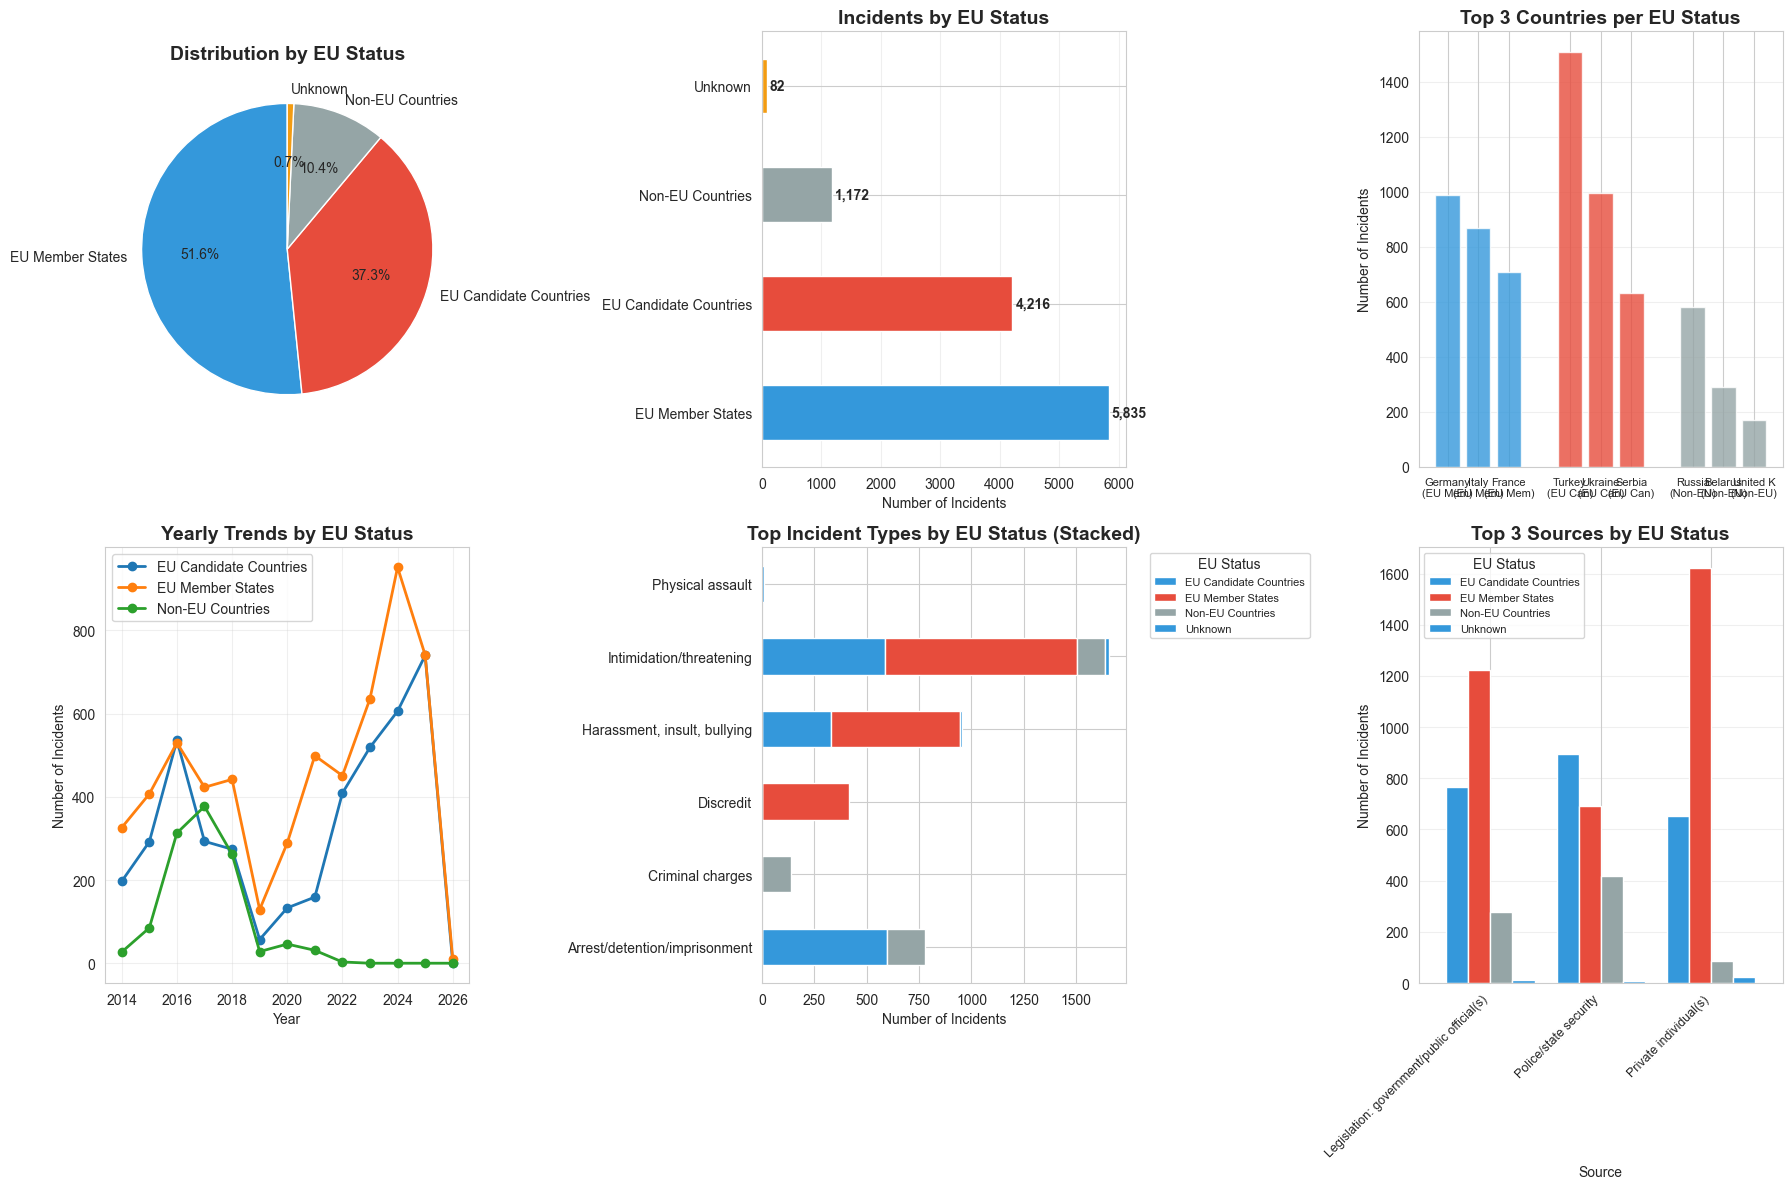

In [25]:

# ============================================================================
# VISUALIZATIONS
# ============================================================================

# Create figure with multiple subplots
fig = plt.figure(figsize=(18, 12))

# 1. Overall Distribution (Pie Chart)
ax1 = plt.subplot(2, 3, 1)
colors = ['#3498db', '#e74c3c', '#95a5a6', '#f39c12']
eu_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, ax=ax1)
ax1.set_title('Distribution by EU Status', fontsize=14, fontweight='bold')
ax1.set_ylabel('')

# 2. Bar Chart - Overall Distribution
ax2 = plt.subplot(2, 3, 2)
eu_status_counts.plot(kind='barh', color=colors, ax=ax2)
ax2.set_title('Incidents by EU Status', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Incidents')
ax2.set_ylabel('')
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(eu_status_counts.values):
    ax2.text(v + 50, i, f'{v:,}', va='center', fontweight='bold')

# 3. Top Countries by Status
ax3 = plt.subplot(2, 3, 3)
top_by_status = df.groupby(['eu_status', 'country']).size().reset_index(name='count')
top_by_status = top_by_status.sort_values('count', ascending=False).groupby('eu_status').head(3)

status_order = ['EU Member States', 'EU Candidate Countries', 'Non-EU Countries']
x_pos = 0
x_ticks = []
x_labels = []

for status in status_order:
    status_data = top_by_status[top_by_status['eu_status'] == status]
    if len(status_data) > 0:
        positions = range(x_pos, x_pos + len(status_data))
        ax3.bar(positions, status_data['count'], 
                color=colors[status_order.index(status)], alpha=0.8)
        
        for i, (pos, row) in enumerate(zip(positions, status_data.itertuples())):
            x_ticks.append(pos)
            x_labels.append(f"{row.country[:8]}\n({status[:6]})")
        
        x_pos += len(status_data) + 1

ax3.set_xticks(x_ticks)
ax3.set_xticklabels(x_labels, fontsize=8, rotation=0)
ax3.set_title('Top 3 Countries per EU Status', fontsize=14, fontweight='bold')
ax3.set_ylabel('Number of Incidents')
ax3.grid(True, alpha=0.3, axis='y')

# 4. Yearly Trends
ax4 = plt.subplot(2, 3, 4)
for status in yearly_by_status.columns:
    if status != 'Unknown':
        ax4.plot(yearly_by_status.index, yearly_by_status[status], 
                marker='o', label=status, linewidth=2)

ax4.set_title('Yearly Trends by EU Status', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Number of Incidents')
ax4.legend(loc='best')
ax4.grid(True, alpha=0.3)

# 5. Incident Types Distribution
ax5 = plt.subplot(2, 3, 5)
top_incidents_by_status = df.groupby(['eu_status', 'primary_incident_type']).size().reset_index(name='count')
top_incidents_by_status = top_incidents_by_status.sort_values('count', ascending=False).groupby('eu_status').head(3)

incident_pivot = top_incidents_by_status.pivot(index='primary_incident_type', 
                                                columns='eu_status', 
                                                values='count').fillna(0)

incident_pivot.plot(kind='barh', stacked=True, ax=ax5, color=colors[:3])
ax5.set_title('Top Incident Types by EU Status (Stacked)', fontsize=14, fontweight='bold')
ax5.set_xlabel('Number of Incidents')
ax5.set_ylabel('')
ax5.legend(title='EU Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# 6. Source Distribution
ax6 = plt.subplot(2, 3, 6)
source_by_status = df.groupby(['eu_status', 'primary_source']).size().reset_index(name='count')

# Get top 3 sources overall
top_sources_overall = df['primary_source'].value_counts().head(3).index

source_filtered = source_by_status[source_by_status['primary_source'].isin(top_sources_overall)]
source_pivot = source_filtered.pivot(index='primary_source', 
                                     columns='eu_status', 
                                     values='count').fillna(0)

source_pivot.plot(kind='bar', ax=ax6, color=colors[:3], width=0.8)
ax6.set_title('Top 3 Sources by EU Status', fontsize=14, fontweight='bold')
ax6.set_xlabel('Source')
ax6.set_ylabel('Number of Incidents')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right', fontsize=9)
ax6.legend(title='EU Status', fontsize=8)
ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('eu_status_analysis.png', dpi=300, bbox_inches='tight')
print("\n" + "=" * 80)
print("VISUALIZATION SAVED: eu_status_analysis.png")
print("=" * 80)

# ============================================================================
# SUMMARY STATISTICS TABLE
# ============================================================================
print("\n" + "=" * 80)
print("SUMMARY STATISTICS BY EU STATUS")
print("=" * 80)

summary_stats = df.groupby('eu_status').agg({
    'id': 'count',
    'country': 'nunique',
    'incident_type_count': 'mean',
    'content_length': 'mean',
    'date': ['min', 'max']
}).round(2)

summary_stats.columns = ['Total Incidents', 'Countries', 'Avg Incident Types', 
                         'Avg Content Length', 'First Incident', 'Last Incident']

print("\n")
print(summary_stats.to_string())

# ============================================================================
# EXPORT TO CSV
# ============================================================================

# Create detailed breakdown
eu_breakdown = df.groupby(['eu_status', 'country']).size().reset_index(name='incident_count')
eu_breakdown = eu_breakdown.sort_values(['eu_status', 'incident_count'], ascending=[True, False])

eu_breakdown.to_csv('eu_status_by_country.csv', index=False)
print("\n" + "=" * 80)
print("DETAILED BREAKDOWN SAVED: eu_status_by_country.csv")
print("=" * 80)

# Create summary by status
status_summary = pd.DataFrame({
    'EU Status': eu_status_counts.index,
    'Total Incidents': eu_status_counts.values,
    'Percentage': (eu_status_counts.values / total * 100).round(2)
})

status_summary.to_csv('eu_status_summary.csv', index=False)
print("SUMMARY TABLE SAVED: eu_status_summary.csv")
print("=" * 80)

print("\n✓ Analysis complete!")
print("\nFiles created:")
print("  1. eu_status_analysis.png - Comprehensive visualizations")
print("  2. eu_status_by_country.csv - Detailed country breakdown")
print("  3. eu_status_summary.csv - Summary statistics")

## 7. Content Length Analysis

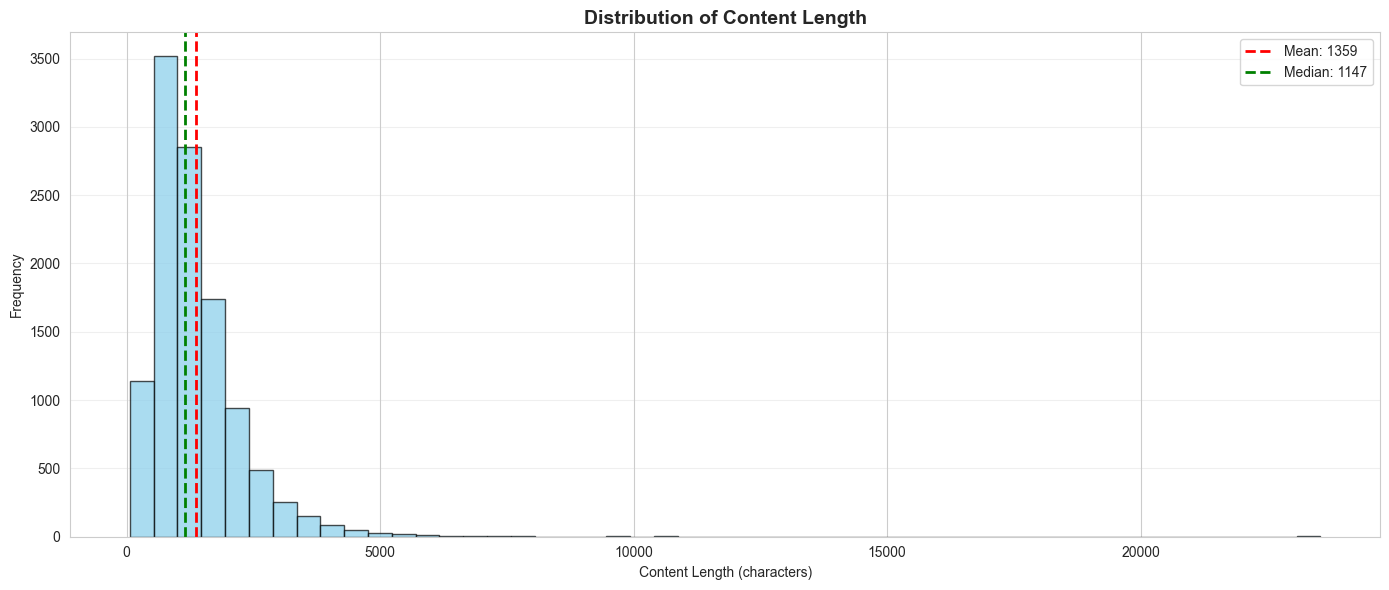

Content Length Statistics:
Mean: 1359 characters
Median: 1147 characters
Std Dev: 966 characters
Min: 63 characters
Max: 23545 characters


In [26]:
# Content length distribution
plt.figure(figsize=(14, 6))
plt.hist(df['content_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['content_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["content_length"].mean():.0f}')
plt.axvline(df['content_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["content_length"].median():.0f}')
plt.title('Distribution of Content Length', fontsize=14, fontweight='bold')
plt.xlabel('Content Length (characters)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Content Length Statistics:")
print(f"Mean: {df['content_length'].mean():.0f} characters")
print(f"Median: {df['content_length'].median():.0f} characters")
print(f"Std Dev: {df['content_length'].std():.0f} characters")
print(f"Min: {df['content_length'].min()} characters")
print(f"Max: {df['content_length'].max()} characters")

## 8. Custom Filtering Examples

In [27]:
# Example 1: Filter by country
country_name = 'Turkey'  # Change this to any country
country_data = df[df['country'] == country_name]

print(f"\n{country_name} Analysis:")
print("=" * 80)
print(f"Total incidents: {len(country_data)}")
print(f"Date range: {country_data['date'].min().strftime('%Y-%m-%d')} to {country_data['date'].max().strftime('%Y-%m-%d')}")
print(f"\nTop incident types in {country_name}:")
print(country_data['primary_incident_type'].value_counts().head(5))
print(f"\nTop sources in {country_name}:")
print(country_data['primary_source'].value_counts().head(5))


Turkey Analysis:
Total incidents: 1507
Date range: 2014-05-01 to 2025-12-31

Top incident types in Turkey:
primary_incident_type
Arrest/detention/imprisonment                              462
Criminal charges                                           111
Legislative initiative (laws restricting media freedom)     94
Intimidation/threatening                                    90
Conviction                                                  62
Name: count, dtype: int64

Top sources in Turkey:
primary_source
Police/state security                         491
Judiciary: court/judicial                     359
Legislation: government/public official(s)    277
Private individual(s)                          97
Unknown source of incident                     62
Name: count, dtype: int64


In [28]:
# Example 2: Filter by date range
start_date = '2024-01-01'
end_date = '2024-12-31'

date_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

print(f"\nIncidents between {start_date} and {end_date}:")
print("=" * 80)
print(f"Total incidents: {len(date_filtered)}")
print(f"\nTop countries:")
print(date_filtered['country'].value_counts().head(10))


Incidents between 2024-01-01 and 2024-12-31:
Total incidents: 1559

Top countries:
country
Germany     229
Italy       157
Ukraine     141
Georgia     139
Turkey      135
France      108
Serbia       84
Spain        76
Hungary      68
Slovakia     50
Name: count, dtype: int64


In [29]:
# Example 3: Filter by incident type
incident_type = 'Arrest/detention/imprisonment'  # Change this
incident_filtered = df[df['primary_incident_type'] == incident_type]

print(f"\nAnalysis of '{incident_type}' incidents:")
print("=" * 80)
print(f"Total incidents: {len(incident_filtered)}")
print(f"\nTop countries:")
print(incident_filtered['country'].value_counts().head(10))
print(f"\nTop sources:")
print(incident_filtered['primary_source'].value_counts().head(5))


Analysis of 'Arrest/detention/imprisonment' incidents:
Total incidents: 930

Top countries:
country
Turkey        462
Russia         81
Belarus        60
Ukraine        55
Georgia        35
Azerbaijan     34
Greece         28
France         24
Germany        17
Serbia         17
Name: count, dtype: int64

Top sources:
primary_source
Police/state security                         666
Judiciary: court/judicial                     120
Legislation: government/public official(s)     93
no data collected                              35
Military/armed forces                           6
Name: count, dtype: int64


In [30]:
# Example 4: Combine multiple filters
complex_filter = df[
    (df['country'].isin(['Turkey', 'Ukraine', 'Russia'])) &
    (df['year'] >= 2020) &
    (df['primary_source'].isin(['Police/state security', 'Judiciary: court/judicial']))
]

print("\nComplex Filter Example:")
print("Countries: Turkey, Ukraine, Russia")
print("Years: 2020 onwards")
print("Sources: Police/state security or Judiciary")
print("=" * 80)
print(f"Total matching incidents: {len(complex_filter)}")
print(f"\nBreakdown by country:")
print(complex_filter['country'].value_counts())
print(f"\nBreakdown by year:")
print(complex_filter['year'].value_counts().sort_index())


Complex Filter Example:
Countries: Turkey, Ukraine, Russia
Years: 2020 onwards
Sources: Police/state security or Judiciary
Total matching incidents: 589

Breakdown by country:
country
Turkey     508
Ukraine     76
Russia       5
Name: count, dtype: int64

Breakdown by year:
year
2020     26
2021     48
2022    137
2023    159
2024    114
2025    105
Name: count, dtype: int64


## 9. Advanced Analysis Examples

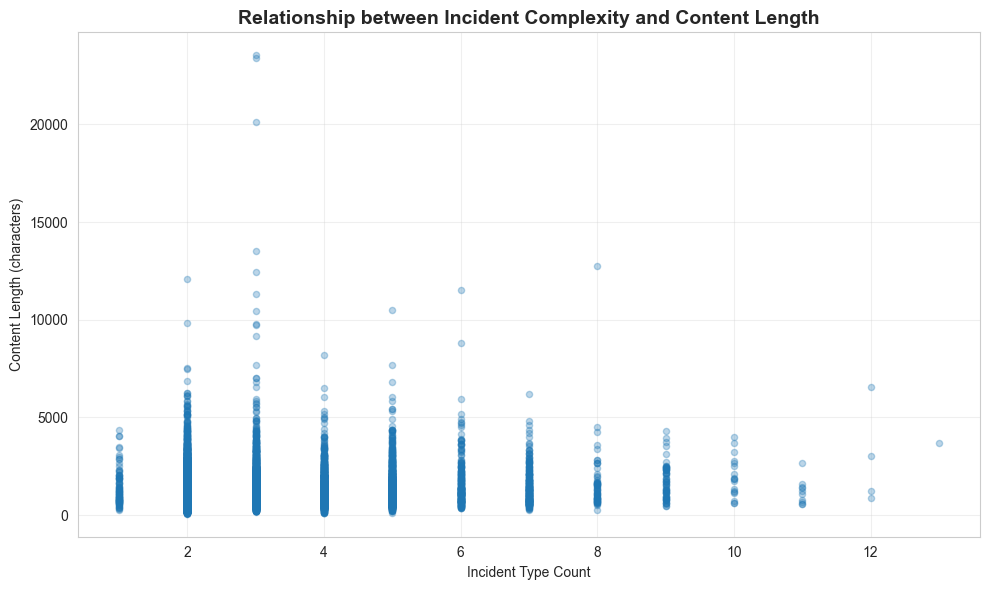

Correlation: 0.058


In [31]:
# Correlation between incident type count and content length
plt.figure(figsize=(10, 6))
plt.scatter(df['incident_type_count'], df['content_length'], alpha=0.3, s=20)
plt.xlabel('Incident Type Count')
plt.ylabel('Content Length (characters)')
plt.title('Relationship between Incident Complexity and Content Length', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

correlation = df['incident_type_count'].corr(df['content_length'])
print(f"Correlation: {correlation:.3f}")

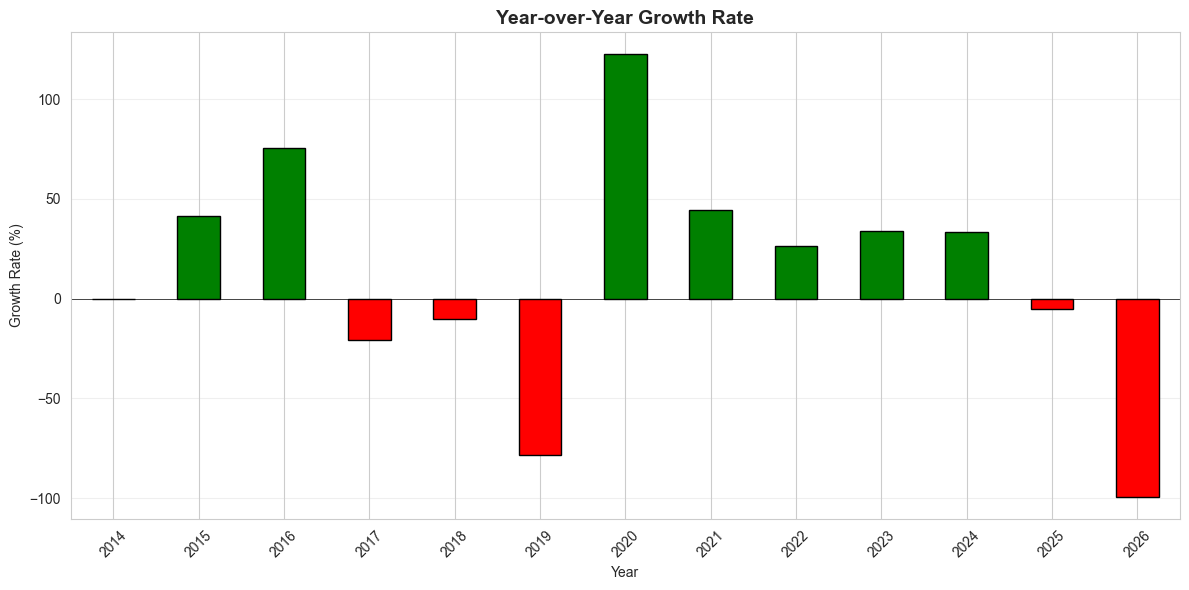

Year-over-Year Growth:
year
2014           NaN
2015     41.323792
2016     75.696203
2017    -20.677233
2018    -10.263397
2019    -78.238866
2020    122.325581
2021     44.560669
2022     26.338640
2023     34.020619
2024     33.247863
2025     -4.939064
2026    -99.257760
dtype: float64


In [32]:
# Year-over-year growth analysis
yearly = df.groupby('year').size()
yoy_growth = yearly.pct_change() * 100

plt.figure(figsize=(12, 6))
yoy_growth.plot(kind='bar', color=['green' if x > 0 else 'red' for x in yoy_growth], edgecolor='black')
plt.title('Year-over-Year Growth Rate', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Year-over-Year Growth:")
print(yoy_growth)

## 10. Export Results

In [33]:
# Create summary statistics dataframe
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Incidents',
        'Date Range Start',
        'Date Range End',
        'Countries Covered',
        'Unique Incident Types',
        'Avg Incidents per Month',
        'Most Common Incident Type',
        'Most Common Source',
        'Top Country'
    ],
    'Value': [
        len(df),
        df['date'].min().strftime('%Y-%m-%d'),
        df['date'].max().strftime('%Y-%m-%d'),
        df['country'].nunique(),
        df['primary_incident_type'].nunique(),
        f"{df.groupby(df['date'].dt.to_period('M')).size().mean():.2f}",
        df['primary_incident_type'].value_counts().index[0],
        df['primary_source'].value_counts().index[0],
        df['country'].value_counts().index[0]
    ]
})

print("Summary Statistics:")
print(summary_stats.to_string(index=False))

# Optional: Save to CSV
# summary_stats.to_csv('mapmf_summary_stats.csv', index=False)
# print("\nSummary saved to mapmf_summary_stats.csv")

Summary Statistics:
                   Metric                    Value
          Total Incidents                    11305
         Date Range Start               2014-01-14
           Date Range End               2026-01-12
        Countries Covered                       45
    Unique Incident Types                       49
  Avg Incidents per Month                    77.97
Most Common Incident Type Intimidation/threatening
       Most Common Source    Private individual(s)
              Top Country                   Turkey


# Null

In [38]:
# Replace "no data collected" with NaN across entire dataframe
df = df.replace("no data collected", np.nan)

In [42]:
# Show rows with at least one null
df_null = df[df.isnull().any(axis=1)]
df_null.columns

Index(['id', 'title', 'date', 'year', 'month', 'day_of_week', 'country',
       'region_level_1', 'region_level_2', 'primary_incident_type',
       'incident_type_count', 'type_of_incident', 'primary_source',
       'source_of_incident', 'context_of_incident', 'region_names', 'content',
       'content_length', 'published_at_date', '_geo_lat', '_geo_lng',
       'eu_status'],
      dtype='object')

In [45]:
df[['id', 'title', 'date', 'year', 'month', 'day_of_week', 'country',
       'region_level_1', 'region_level_2', 'primary_incident_type',
       'incident_type_count', 'type_of_incident', 'primary_source',
       'source_of_incident', 'context_of_incident', 'region_names', 'content',
       'content_length', 'published_at_date', '_geo_lat', '_geo_lng',
       'eu_status']].isnull().sum()

id                          0
title                       0
date                        0
year                        0
month                       0
day_of_week                 0
country                     0
region_level_1              0
region_level_2            131
primary_incident_type      99
incident_type_count         0
type_of_incident           99
primary_source            165
source_of_incident        165
context_of_incident      4797
region_names                0
content                     0
content_length              0
published_at_date           0
_geo_lat                    0
_geo_lng                    0
eu_status                   0
dtype: int64

In [57]:
df_null=df[df[['type_of_incident']].isnull().any(axis=1)]
df_null["country"].value_counts()

country
Ukraine                   13
Hungary                   12
Russia                    12
France                     9
United Kingdom             8
Spain                      6
Turkey                     6
Poland                     5
Germany                    4
Croatia                    3
Montenegro                 2
Greece                     2
Serbia                     2
Romania                    2
Austria                    2
North Macedonia            1
Slovenia                   1
Cyprus                     1
Belarus                    1
Netherlands                1
Bulgaria                   1
Kosovo                     1
Bosnia and Herzegovina     1
Lithuania                  1
Latvia                     1
Estonia                    1
Name: count, dtype: int64

In [58]:
df_null=df[df[['source_of_incident']].isnull().any(axis=1)]
df_null["country"].value_counts()

country
Turkey                    54
Russia                    22
Italy                     20
Spain                      6
Belarus                    6
Ukraine                    6
Malta                      5
Germany                    5
Azerbaijan                 5
United Kingdom             5
Poland                     4
Albania                    3
Serbia                     3
Bosnia and Herzegovina     2
France                     2
Belgium                    2
Lithuania                  2
Ireland                    2
Hungary                    2
Austria                    1
Croatia                    1
Greece                     1
Romania                    1
Latvia                     1
Slovakia                   1
Kosovo                     1
Netherlands                1
Denmark                    1
Name: count, dtype: int64

In [ ]:
df_null=df[df[['context_of_incident']].isnull().any(axis=1)]
df_null["country"].value_counts()

country
Turkey                    690
Russia                    567
Ukraine                   411
Italy                     366
Belarus                   280
Hungary                   247
France                    222
Spain                     201
Poland                    181
Serbia                    154
Germany                   144
Croatia                   127
Romania                   127
Bosnia and Herzegovina    115
Azerbaijan                112
North Macedonia           112
United Kingdom             99
Greece                     82
Netherlands                65
Bulgaria                   52
Montenegro                 46
Albania                    39
Kosovo                     38
Malta                      37
Lithuania                  32
Belgium                    31
Sweden                     29
Austria                    24
Latvia                     24
Slovakia                   21
Portugal                   18
Cyprus                     17
Czechia                    16
Sl

# Exploratory Data Analysis Report
## MAPMF Alerts Dataset

---

## 1. Dataset Overview

**Total Records:** 11,305 incidents  
**Time Period:** January 14, 2014 - January 12, 2026  
**Geographic Coverage:** 45 countries across Europe and neighboring regions  
**Total Columns:** 21 features

### Data Quality
- **Missing Values:** Only 131 records (1.16%) have missing `region_level_2` data
- **Data Completeness:** 98.84% complete across all fields
- **Memory Usage:** 38.64 MB

---

## 2. Key Findings

### Temporal Patterns

**Overall Trends:**
- The dataset spans approximately 12 years of media freedom incidents
- Average incidents per month: **78**
- Peak activity month: **July 2016** and **October 2025** (161 incidents each)
- Recent months show elevated activity levels, with several months in 2024-2025 exceeding 150 incidents

**Day of Week Distribution:**
- Most incidents occur on **Thursday** (1,980 incidents)
- Weekdays account for the majority of incidents
- Weekend incidents are notably lower (Saturday: 1,180; Sunday: 966)

### Geographic Distribution

**Top 10 Countries by Incident Count:**
1. **Turkey** - 1,507 incidents (13.3%)
2. **Ukraine** - 995 incidents (8.8%)
3. **Germany** - 989 incidents (8.7%)
4. **Italy** - 869 incidents (7.7%)
5. **France** - 709 incidents (6.3%)
6. **Serbia** - 632 incidents (5.6%)
7. **Russia** - 582 incidents (5.1%)
8. **Hungary** - 456 incidents (4.0%)
9. **Spain** - 442 incidents (3.9%)
10. **Poland** - 366 incidents (3.2%)

**Geographic Spread:**
- Incidents cover a wide geographic area (latitude: -21.13° to 69.65°; longitude: -149.39° to 158.65°)
- 379 unique sub-national regions identified
- Marmara Region (Turkey) is the most frequent location with 716 incidents

### Incident Types

**Top 10 Primary Incident Types:**
1. **Intimidation/threatening** - 1,655 incidents (14.6%)
2. **Harassment, insult, bullying** - 1,019 incidents (9.0%)
3. **Arrest/detention/imprisonment** - 930 incidents (8.2%)
4. **Discredit** - 683 incidents (6.0%)
5. **Without injury (physical assault)** - 605 incidents (5.4%)
6. **Physical assault** - 598 incidents (5.3%)
7. **Injury (physical assault resulting in injury)** - 589 incidents (5.2%)
8. **Legislative initiative (laws restricting media freedom)** - 579 incidents (5.1%)
9. **Blocked journalistic activity** - 509 incidents (4.5%)
10. **Civil legal actions/lawsuits** - 372 incidents (3.3%)

**Incident Complexity:**
- Average incident types per incident: **3.06**
- Median: **2 types**
- Maximum: **13 different types** in a single incident
- This indicates many incidents involve multiple forms of interference

### Sources of Incidents

**Top Primary Sources:**
1. **Private individual(s)** - 2,385 incidents (21.1%)
2. **Legislation: government/public official(s)** - 2,275 incidents (20.1%)
3. **Police/state security** - 2,015 incidents (17.8%)
4. **Unknown source** - 1,498 incidents (13.3%)
5. **Judiciary: court/judicial** - 746 incidents (6.6%)
6. **Employer/publisher/colleague(s)** - 556 incidents (4.9%)

**Notable Country-Source Combinations:**
- Germany + Private individuals: 567 incidents
- Turkey + Police/state security: 491 incidents
- Turkey + Judiciary: 359 incidents

### Context of Incidents

**Where Incidents Occur:**
1. **No data collected** - 4,797 incidents (42.4%)
2. **Online/digital** - 1,510 incidents (13.4%)
3. **During a demonstration** - 1,138 incidents (10.1%)
4. **At court** - 789 incidents (7.0%)
5. **Public place/street** - 730 incidents (6.5%)

*Note: A significant portion of incidents lack context data, suggesting this field may not always be captured.*

### Content Analysis

**Content Length Statistics:**
- Mean: **1,359 characters**
- Median: **1,147 characters**
- Range: 63 - 23,545 characters
- Most incident descriptions are moderately detailed, with some highly detailed reports

---

## 3. Notable Patterns

### Harassment and Intimidation Dominance
Nearly a quarter of all incidents involve intimidation, threatening, harassment, or bullying behavior, suggesting psychological pressure is a common tactic against media workers.

### State Actor Involvement
Combining police/state security, government officials, and judiciary sources accounts for approximately **44% of incidents**, indicating substantial state involvement in media freedom violations.

### Physical Violence
Physical assault incidents (with or without injury) together account for over 1,700 cases, representing **~15%** of all incidents.

### Legal Pressure
Legal mechanisms (arrests, lawsuits, legislative initiatives) are used in a significant number of cases, showing how formal legal processes can be weaponized against journalists.

### Digital Sphere Growing
Online/digital incidents represent a growing concern, with 1,510 incidents occurring in digital spaces.

---

## 4. Data Characteristics

### High Uniqueness in Text Fields
- **11,268 unique titles** out of 11,305 records (99.7% unique)
- **11,301 unique content descriptions** (99.96% unique)
- This indicates each incident is largely unique with minimal duplication

### Temporal Recording
- Two date fields exist: `date` (incident date) and `published_at_date` (publication date)
- Large bulk of data was published on **February 16, 2018** (3,919 records), suggesting a major database publication or migration event

---

## 5. Recommendations for Further Analysis

1. **Time Series Analysis**: Examine trends over time, especially the spike in 2016 and recent increases in 2024-2025

2. **Geographic Clustering**: Analyze spatial patterns and hotspots using the latitude/longitude data

3. **Network Analysis**: Explore relationships between sources, incident types, and countries

4. **Text Mining**: Perform sentiment analysis and topic modeling on the content field

5. **Comparative Analysis**: Compare incident patterns between EU member states, EU candidates, and non-EU countries

6. **Severity Assessment**: Develop a severity index based on incident type combinations

7. **Context Gap Analysis**: Investigate why 42% of incidents lack context data and if there are patterns in missing data

---

## 6. Visualizations Generated

Three sets of visualizations have been created:

1. **eda_visualizations.png** - Overview charts including yearly trends, top countries, day of week patterns, incident types, sources, and contexts

2. **temporal_analysis.png** - Time series showing monthly incident trends and yearly comparisons

3. **detailed_analysis.png** - In-depth analysis of incident type counts, content length distribution, country-incident breakdowns, and source-incident combinations

---